In [1]:
import numpy as np
import torch 
import sys
sys.path.append("../")

import tqdm
import yaml
torch.random.manual_seed(300)
import matplotlib.pyplot as plt

import utils_BayOTIDE as utils

from model_BayOTIDE import BayTIDE

from model_LDS import LDS_GP_streaming

In [2]:


config_path = "./config_solar.yaml"
with open(config_path, "r") as f:
    config = yaml.safe_load(f)

data_file = config["data_path"] 

hyper_dict = utils.make_hyper_dict(config)

data_dict = utils.make_data_dict(hyper_dict,data_file,fold=0)

model = BayTIDE(hyper_dict,data_dict)

model.reset()

INNER_ITER = hyper_dict["INNER_ITER"]
EVALU_T = hyper_dict["EVALU_T"]
for epoch in range(1):
    model.reset()
    for T_id in tqdm.tqdm(range(model.T)):
        model.filter_predict(T_id)
        model.msg_llk_init()

        for inner_it in range(INNER_ITER):

            flag = (inner_it == (INNER_ITER - 1))

            model.msg_approx_W(T_id)
            model.post_update_W(T_id)

            model.msg_approx_U(T_id)
            model.filter_update(T_id,flag)

        model.msg_approx_tau(T_id)
        model.post_update_tau(T_id)

        if T_id % EVALU_T == 0 or T_id == model.T - 1:
            
            _, loss_dict = model.model_test(T_id)
            print("T_id = {}, train_rmse = {:.2f}, test_rmse= {:.2f}".format(T_id, loss_dict["train_RMSE"], loss_dict["test_RMSE"]))

    model.smooth()
    model.post_update_U_after_smooth(0)
    _, loss_dict = model.model_test(T_id)
    print("after smooth, train_rmse = {:.2f}, test_rmse= {:.2f},  test_MAE= {:.2f}".format(loss_dict["train_RMSE"] ,loss_dict["test_RMSE"], loss_dict["test_MAE"]))



use device: cpu


  0%|          | 1/52560 [00:00<1:53:48,  7.70it/s]/home/venus/fang/BayTIDE/notebook/../model_LDS.py:252: UserWarning: An output with one or more elements was resized since it had shape [1, 30, 30], which does not match the required output shape [1, 1, 30, 30]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  /opt/conda/conda-bld/pytorch_1659484806139/work/aten/src/ATen/native/Resize.cpp:17.)
  self.A = torch.matrix_exp(self.F * time_int).double()
  0%|          | 34/52560 [00:00<05:00, 174.69it/s]

T_id = 0, train_rmse = 10.35, test_rmse= 10.36


  5%|▍         | 2532/52560 [00:07<03:02, 273.94it/s]

T_id = 2500, train_rmse = 10.18, test_rmse= 10.19


 10%|▉         | 5054/52560 [00:15<02:43, 289.86it/s]

T_id = 5000, train_rmse = 9.92, test_rmse= 9.93


 14%|█▍        | 7553/52560 [00:23<02:44, 273.28it/s]

T_id = 7500, train_rmse = 9.67, test_rmse= 9.68


 19%|█▉        | 10056/52560 [00:31<02:38, 268.92it/s]

T_id = 10000, train_rmse = 9.35, test_rmse= 9.36


 24%|██▍       | 12548/52560 [00:39<02:28, 269.37it/s]

T_id = 12500, train_rmse = 9.01, test_rmse= 9.03


 29%|██▊       | 15053/52560 [00:47<02:16, 274.45it/s]

T_id = 15000, train_rmse = 8.61, test_rmse= 8.63


 30%|██▉       | 15631/52560 [00:49<01:56, 317.94it/s]


KeyboardInterrupt: 

In [1]:


config_path = "./config_solar.yaml"
with open(config_path, "r") as f:
    config = yaml.safe_load(f)

data_file = config["data_path"] 

hyper_dict = utils.make_hyper_dict(config)

data_dict = utils.make_data_dict(hyper_dict,data_file,fold=0)

model = BayTIDE(hyper_dict,data_dict)

model.reset()

INNER_ITER = hyper_dict["INNER_ITER"]
EVALU_T = hyper_dict["EVALU_T"]
for epoch in range(1):
    model.reset()
    for T_id in tqdm.tqdm(range(model.T)):
        model.filter_predict(T_id)
        model.msg_llk_init()

        for inner_it in range(INNER_ITER):

            flag = (inner_it == (INNER_ITER - 1))

            model.msg_approx_W(T_id)
            model.post_update_W(T_id)

            model.msg_approx_U(T_id)
            model.filter_update(T_id,flag)

        model.msg_approx_tau(T_id)
        model.post_update_tau(T_id)

        if T_id % EVALU_T == 0 or T_id == model.T - 1:
            
            _, loss_dict = model.model_test(T_id)
            print("T_id = {}, train_rmse = {:.2f}, test_rmse= {:.2f}".format(T_id, loss_dict["train_RMSE"], loss_dict["test_RMSE"]))

    model.smooth()
    model.post_update_U_after_smooth(0)
    _, loss_dict = model.model_test(T_id)
    print("after smooth, train_rmse = {:.2f}, test_rmse= {:.2f},  test_MAE= {:.2f}".format(loss_dict["train_RMSE"] ,loss_dict["test_RMSE"], loss_dict["test_MAE"]))



use device: cuda


  0%|          | 1/52560 [00:00<9:13:40,  1.58it/s]/home/venus/fang/BayTIDE/notebook/../model_LDS.py:252: UserWarning: An output with one or more elements was resized since it had shape [1, 50, 50], which does not match the required output shape [1, 1, 50, 50]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  /opt/conda/conda-bld/pytorch_1659484806139/work/aten/src/ATen/native/Resize.cpp:17.)
  self.A = torch.matrix_exp(self.F * time_int).double()
/home/venus/fang/BayTIDE/notebook/../model_LDS.py:252: UserWarning: An output with one or more elements was resized since it had shape [1, 10, 10], which does not match the required output shape [1, 1, 10, 10]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicit

T_id = 0, train_rmse = 10.75, test_rmse= 10.73


  1%|          | 605/52560 [00:23<33:07, 26.14it/s]

after smooth, train_rmse = 1.46, test_rmse= 1.71,  test_MAE= 0.74


(55, 52560)
(55, 55, 52560)


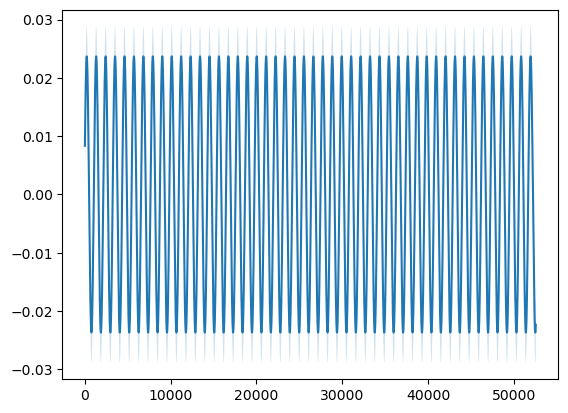

In [18]:
post_U_m = model.post_U_m.detach().numpy().squeeze()
post_U_v = model.post_U_v.detach().numpy()

# check shape

print(post_U_m.shape)
print(post_U_v.shape)

# check the first 20 values of post_U by ploting

target_factor_idx =52



x = np.arange(model.T)
plt.plot(x, post_U_m[target_factor_idx,:])
plt.fill_between(x, post_U_m[target_factor_idx,:] - 2 * np.sqrt(post_U_v[target_factor_idx,target_factor_idx,:]), post_U_m[target_factor_idx,:] + 2 * np.sqrt(post_U_v[target_factor_idx,target_factor_idx,:]), alpha=0.2)


In [19]:
post_W_m = model.post_W_m.detach().numpy().squeeze()
post_W_m.shape
post_W_m.mean(axis=0)


array([ 0.1679695 ,  0.10232636,  0.22271733, -0.00518541,  0.25013223,
        0.31703649,  0.36417539, -0.1537356 ,  0.16422315,  0.29126067,
        0.08208783, -0.07553139,  0.01588293, -0.18557872, -0.04690298,
        0.70680664,  0.20730441,  0.41503223,  0.17349358,  0.04250141,
        0.12650463, -0.00866989,  0.09526161,  0.1279892 , -0.07112958,
        0.12106536,  0.1864706 , -0.03189867,  0.68418966, -0.09142268,
        0.20158017, -0.18175571,  0.19147425,  0.21021121,  0.14182266,
        0.31575217,  0.24240189,  0.4409649 ,  0.08306346,  0.26857332,
        0.54898405, -0.12712183,  0.06683749,  0.26150953, -0.20981978,
        0.04579578,  0.04385672,  0.20673057, -0.11657198,  0.12339768,
       -0.02546642, -0.30098199,  0.04903455, -0.00982236,  0.00071813])